<a href="https://colab.research.google.com/github/UmaGhildiyal/Deep_Neural_Networks_YT/blob/main/gpu_performance_test_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries and Dataset

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tf.config.experimental.list_physical_devices()

# if GPU not visible ---> Runtime > Change runtime type > T4 GPU > save
# if GPU available ---> install lib from vv
# https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbi1iMklwX2Y2aENhYXU4d2kxOHJ5bGVRWjBid3xBQ3Jtc0ttaHV4dlI5WHlBMWVQSkhCUGZEUTFBMXZPQk5vRFJ2eHRMU093MlNva0hqUlc2WmdLX0J1ekI1X2FVa2F1NmY3NlBLUmZqc0U2TFVCZ3IzbFh2MHBkSlgxRGNGYUVnZWxFcTB0LS01ZHFWUTh1OFhZWQ&q=https%3A%2F%2Fshawnhymel.com%2F1961%2Fhow-to-install-tensorflow-with-gpu-support-on-windows%2F&v=YmDaqXMIoeY

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()
# to check if tf is built with cuda

True

## **Dataset loaded from keras:**
We are using 60000 small images for classification.
These images can be  classified in one of the 10 categories below,

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Here is the dataset link: https://www.cs.toronto.edu/~kriz/cifa...

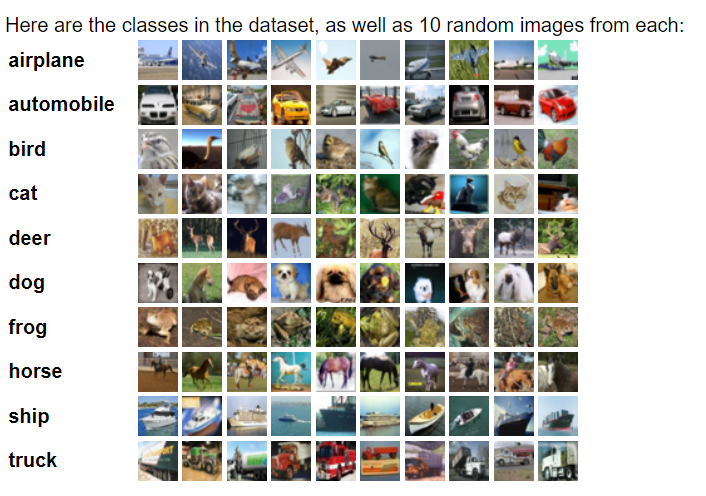

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [6]:
X_train.shape
# 50000 -> training sample
# 32 by 32 pixels
# 3 -> RGB

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
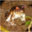

In [8]:
X_train[0]

In [9]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
def plot_sample(index):
  plt.figure(figsize = (10,1))
  plt.imshow(X_train[index])

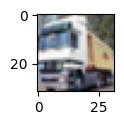

In [11]:
plot_sample(1)

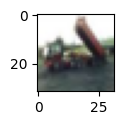

In [12]:
plot_sample(2)

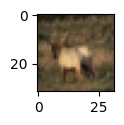

In [13]:
plot_sample(3)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
classes[y_train[3][0]]

'deer'

# Scaling and Hot encoding

**Scaling:**
*   devide by 255
*   rgb values are in the range [0, 255]
*   normalize vakue bw 0-1

**Hot Encoding:**
*   array of size 10
*   where the true element = 1, rest =0

In [16]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [17]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [18]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [19]:
# hot encoding
# array of size 10, where the true element = 1, rest =0

y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype= 'float32'
    )
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [21]:
#hot encoding for y_test

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype= 'float32'
    )

# Model Building

In [22]:
X_train.shape
# needs to be flattend

(50000, 32, 32, 3)

In [23]:
32*32*3
# input size

3072

**sparse_categorical_crossentropy**
*   y -> discreete value



**categorical_crossentropy**
*   one hot encpded categorical value



In [25]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = 'relu'),
    keras.layers.Dense(1000, activation = 'relu'),
    # keras.layers.Dense(500, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_scaled, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8136 - accuracy: 0.3561
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6244 - accuracy: 0.4268
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5410 - accuracy: 0.4562
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4801 - accuracy: 0.4784
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4308 - accuracy: 0.4959
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3884 - accuracy: 0.5117
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3504 - accuracy: 0.5259
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3136 - accuracy: 0.5384
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2824 - accuracy: 0.5497
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.251

In [30]:
classes[y_test[1][0]]

'ship'

In [31]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 [==============================] - 1s 2ms/step


'ship'

In [32]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.5463 - accuracy: 0.5593


[1.5462753772735596, 0.5593000054359436]

In [33]:
def get_model():
  model = keras.Sequential([
      keras.layers.Flatten(input_shape = (32,32,3)),
      keras.layers.Dense(3000, activation='relu'),
      keras.layers.Dense(1000, activation='relu'),
      keras.layers.Dense(10, activation='sigmoid'),
  ])

  model.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

Running on CPU

In [36]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpu_model = get_model()
  cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 131s 84ms/step - loss: 1.8150 - accuracy: 0.3555
2min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Running on GPU

In [40]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  gpu_model = get_model()
  gpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 9s 5ms/step - loss: 1.8143 - accuracy: 0.3528
13 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
